In [143]:
from platform import python_version
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show, draw, figure, cm

import statsmodels.api as sm
import pylab as pl

import seaborn as ns

from pylab import *
from mpl_toolkits.mplot3d import Axes3D

import random
import missingno as msno
import sys

from statistics import stdev 
from datetime import date
import time as ti

# print(python_version())

# Library for SQL
# pip install pandasql
from pandasql import sqldf
# Example: sqldf("SELECT * FROM customer_churn LIMIT 10;").head()

# Libraries needed for ML
from pandas.plotting import scatter_matrix
from sklearn import model_selection

from sklearn.model_selection import train_test_split

# Feature Scaling - Standardization
from sklearn.preprocessing import StandardScaler 
# We don't need to scale independent variables

from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.dummy import DummyClassifier

# !pip install imblearn # This worked

"""
pip install -U imbalanced-learn 
pip install imblearn
!pip install imblearn 
pip install -c glemaitre imbalanced-learn 
pip install imblearn==0.0
"""# conda install -c glemaitre imbalanced-learn # if pip doesn't work use conda.
from imblearn.over_sampling import SMOTE # if this doesn't work use: conda install imbalanced-learn
 
# Libraries needed for ML Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
# pip install graphviz
import graphviz

# from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Introduction to Machine Learning Assignment

# Problem Statement:

# Consider yourself to be Sam who is a data scientist. He has been approached by a telecom company to do some predictive analytics.

# Tasks to be performed:

# 1. Sam has to build a model on top of the customer_churn dataset:
# a. To find out how does ‘tenure’ change/vary w.r.t change in ‘MonthlyCharges’ of the customer
# b. To find out how does ‘tenure’ change/vary w.r.t change in ‘TotalCharges’ of the customer.
# c. To understand which factor influences the ‘tenure’ of the customer more -> ‘MonthlyCharges’ or ‘TotalCharges’

# 2. Sam has to build another model on top of the ‘customer_churn’ dataset:
# a. To find out if the customer would ‘Churn’ or not w.r.t the ‘PaymentMethod’ used by the customer
# b. To find out if the customer would ‘Churn’ or not w.r.t the ‘Contract’ type of the customer.
# c. To find out if the customer would ‘Churn’ or not w.r.t the ‘MonthlyCharges’ incurred by the customer
# d. To understand which factor influences the ‘Churn’ of the customer more -> ‘PaymentMethod’ or ‘Contract’ or ‘MonthlyCharges’

# Answers:

# 1. Regression: 
# We will do the regression using Multi Linear, and Random Forest Regressor to see the RMSE value
# Then, we will select the model and answer questions (a), (b) and 
# Then (c) by selecting the important Features

# 2. Classification: 
# We will do the classification using Multi Logistics Regression and Random Forest Classifier to see the Accuracy value
# Then, we will select the model and answer questions (a), (b), (c) and 
# Then (d) by selecting the important Features

In [35]:
customer_churn = pd.read_csv("/Users/vijaygomatam/Documents/Learn_DataScience/Python_3_7_6_VJ/Data_Files/customer_churn.csv")

# Answer 1. Regression

In [36]:
customer_churn.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,9667-TKTVZ,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [37]:
customer_churn.TotalCharges.unique() # 6531

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [38]:
customer_churn.isnull().sum() # None

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
regFeatures = customer_churn[['tenure','MonthlyCharges','TotalCharges']]

In [40]:
regFeatures.isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [41]:
regFeatures.isnull().values.any()

False

In [42]:
regFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 165.2+ KB


In [43]:
print(str(regFeatures['TotalCharges'][488]).isspace())
print(str(regFeatures['TotalCharges'][753]).isspace())
print(str(regFeatures['TotalCharges'][936]).isspace())
print(str(regFeatures['TotalCharges'][1082]).isspace())
print(str(regFeatures['TotalCharges'][1340]).isspace())
print(str(regFeatures['TotalCharges'][3331]).isspace())
print(str(regFeatures['TotalCharges'][4380]).isspace())
print(str(regFeatures['TotalCharges'][5218]).isspace())
print(str(regFeatures['TotalCharges'][6670]).isspace())
print(str(regFeatures['TotalCharges'][6754]).isspace())
print(str(regFeatures['TotalCharges'][3826]).isspace())

# There are 11 values with spaces.

# Mean:  2283.3004408418697
# Median:  1397.475
# Std Dev:  2266.6101807145355

# As Median seems more realistic, we will replace them will Median

True
True
True
True
True
True
True
True
True
True
True


In [44]:
str(regFeatures['TotalCharges'][3826]).isspace()

True

In [45]:
# convert to float
regFeatures['TotalCharges'] = pd.to_numeric(regFeatures['TotalCharges'] , errors='coerce' )

/Users/vijaygomatam/Documents/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
print(str(regFeatures['TotalCharges'][488]).isspace())
print(str(regFeatures['TotalCharges'][753]).isspace())
print(str(regFeatures['TotalCharges'][936]).isspace())
print(str(regFeatures['TotalCharges'][1082]).isspace())
print(str(regFeatures['TotalCharges'][1340]).isspace())
print(str(regFeatures['TotalCharges'][3331]).isspace())
print(str(regFeatures['TotalCharges'][4380]).isspace())
print(str(regFeatures['TotalCharges'][5218]).isspace())
print(str(regFeatures['TotalCharges'][6670]).isspace())
print(str(regFeatures['TotalCharges'][6754]).isspace())
print(str(regFeatures['TotalCharges'][3826]).isspace())

False
False
False
False
False
False
False
False
False
False
False


In [47]:
regFeatures.describe(include="all")
# There are 11 records that are blank

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [48]:
isnan(regFeatures.TotalCharges)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [49]:
regFeatures.TotalCharges.sort_values(ascending=False)

4610    8684.80
4586    8672.45
6768    8670.10
5347    8594.40
2187    8564.75
         ...   
3826        NaN
4380        NaN
5218        NaN
6670        NaN
6754        NaN
Name: TotalCharges, Length: 7043, dtype: float64

In [50]:
regFeatures.TotalCharges[6754]

nan

In [51]:
regFeatures.TotalCharges[488]

nan

In [52]:
regFeatures[regFeatures.tenure==1]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
20,1,39.65,39.65
22,1,20.15,20.15
27,1,30.20,30.20
33,1,20.20,20.20
...,...,...,...
6979,1,24.20,24.20
7010,1,74.45,74.45
7016,1,49.95,49.95
7018,1,70.65,70.65


In [53]:
regFeatures[regFeatures.tenure==0]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [54]:
regFeatures[regFeatures['TotalCharges'].isnull()]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [55]:
# Fillna will substitute all NULL values with 0 in this scenario.

# Missing (Blank) Value Treatment

# Observation: The TotalCharges are null for tenure = 0. In this scenario, the total charges should also be 0.

# Fillna will substitute all NULL values with 0 in this scenario.

In [56]:
regFeatures.TotalCharges = regFeatures.TotalCharges.fillna(0.00)

/Users/vijaygomatam/Documents/Softwares/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [57]:
regFeatures[regFeatures['TotalCharges'].isnull()]

,tenure,MonthlyCharges,TotalCharges


(array([1851.,  850.,  683.,  544.,  378.,  307.,  260.,  243.,  230.,
         230.,  207.,  207.,  194.,  202.,  165.,  146.,  125.,   99.,
          83.,   39.]),
 array([   0.  ,  434.24,  868.48, 1302.72, 1736.96, 2171.2 , 2605.44,
        3039.68, 3473.92, 3908.16, 4342.4 , 4776.64, 5210.88, 5645.12,
        6079.36, 6513.6 , 6947.84, 7382.08, 7816.32, 8250.56, 8684.8 ]),
 <a list of 20 Patch objects>)

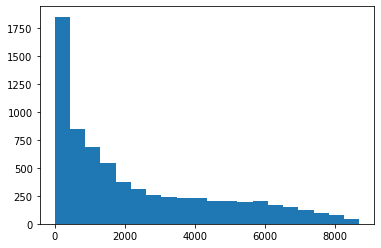

In [58]:
plt.hist(regFeatures.TotalCharges,20)

# Left Skewed

In [59]:
regFeatures.TotalCharges.median()

1394.55

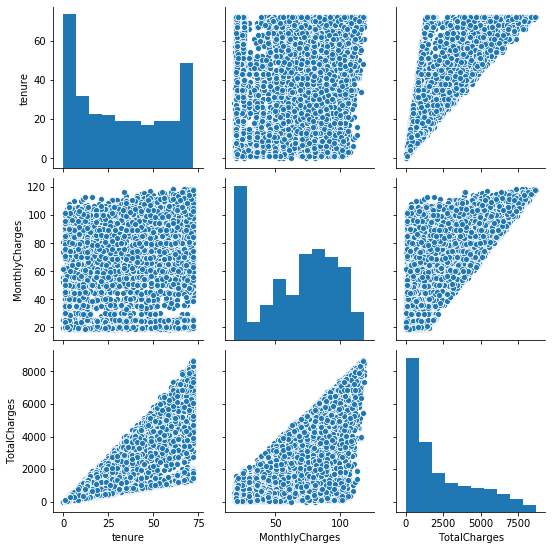

In [60]:
ns.pairplot(regFeatures)

# No right outliers in TotalCharges as of now.
# We will check the quantile values too, and compare it with tenure data too.

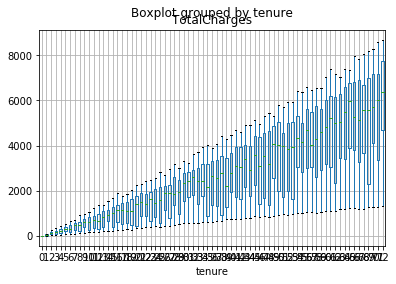

In [61]:
regFeatures.boxplot("TotalCharges",by = "tenure")
# Linear

In [62]:
print(regFeatures.groupby('TotalCharges').std(ddof=0))

              tenure  MonthlyCharges
TotalCharges                        
0.00             0.0       22.722429
18.80            0.0        0.000000
18.85            0.0        0.000000
18.90            0.0        0.000000
19.00            0.0        0.000000
...              ...             ...
8564.75          0.0        0.000000
8594.40          0.0        0.000000
8670.10          0.0        0.000000
8672.45          0.0        0.000000
8684.80          0.0        0.000000

[6531 rows x 2 columns]


In [63]:
regFeatures[regFeatures.tenure==0]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,0.0
753,0,20.25,0.0
936,0,80.85,0.0
1082,0,25.75,0.0
1340,0,56.05,0.0
3331,0,19.85,0.0
3826,0,25.35,0.0
4380,0,20.00,0.0
5218,0,19.70,0.0
6670,0,73.35,0.0


In [64]:
regFeatures[regFeatures.tenure==1]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
20,1,39.65,39.65
22,1,20.15,20.15
27,1,30.20,30.20
33,1,20.20,20.20
...,...,...,...
6979,1,24.20,24.20
7010,1,74.45,74.45
7016,1,49.95,49.95
7018,1,70.65,70.65


count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64
0.00       11
20.20      11
19.75       9
19.90       8
19.65       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6531, dtype: int64
Mean:  2279.734303563826
Median:  1394.55
Std Dev:  2266.6335386271085
99th percentile:  8039.255999999999
1st percentile:  19.75
8684.8
0.0
(array([2701., 1227.,  685.,  503.,  460.,  414.,  396.,  311.,  224.,
        122.]), array([   0.  ,  868.48, 1736.96, 2605.44, 3473.92, 4342.4 , 5210.88,
       6079.36, 6947.84, 7816.32, 8684.8 ]), <a list of 10 Patch objects>)


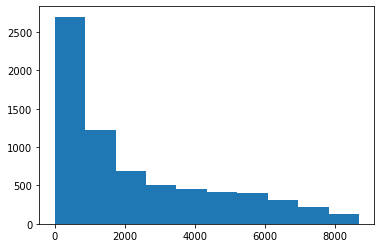

In [65]:
print(regFeatures.TotalCharges.describe(include="all"))
# print(ns.countplot(x='TotalCharges',data=regFeatures))
# print(diab.groupby('TotalCharges').size().sort_values)
print(regFeatures.TotalCharges.value_counts())
# print(regFeatures.boxplot("TotalCharges",by = "tenure"))
print("Mean: ", regFeatures.TotalCharges.mean()) 
print("Median: ", regFeatures.TotalCharges.median()) 

print("Std Dev: ", std(regFeatures.TotalCharges)) 
# print(regFeatures[regFeatures.TotalCharges > 0].sum())
print("99th percentile: ", quantile(regFeatures.TotalCharges, .99))
print("1st percentile: ", quantile(regFeatures.TotalCharges, .01))
print(max(regFeatures.TotalCharges))
print(min(regFeatures.TotalCharges))
print(plt.hist(regFeatures.TotalCharges))
# print(np.where(regFeatures.TotalCharges == 99,diab.Insulin.median(),""))

In [66]:
regFeatures[regFeatures.TotalCharges>8039].tenure.unique()

array([72, 71, 70, 69])

# The TotalCharges have been high for the high tenure values: 72, 71, 70 and 69, which makes sense.
# Hence, Outlier Treatment is not needed

In [67]:
regFeatures.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


In [68]:
regFeatures[regFeatures.TotalCharges>8039].tenure.unique()

array([72, 71, 70, 69])

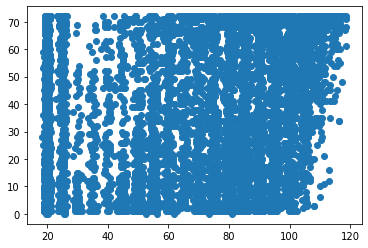

In [69]:
plt.scatter(regFeatures.MonthlyCharges,regFeatures.tenure)

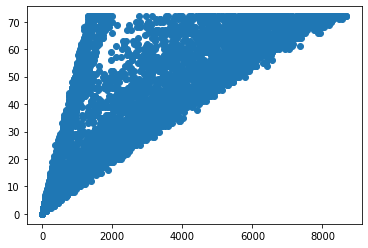

In [70]:
plt.scatter(regFeatures.TotalCharges,regFeatures.tenure)

# Inference: From Correlation and ScatterPlot, looks like TotalCharges is highliy correlated with tenure than does MonthlyCharges

# This makes sense, because: as tenure increases the TotalCharges will be increasing.

# On the other hand, MonthlyCharges remain close to constant, and hence, doesn't add much value to the model.

# However, we will use it in Linear Regression and see it's coefficients to confirms it important.

# Multi Linear Regression

In [71]:
regFeatures

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [72]:
y = regFeatures.iloc[:,0]
x = regFeatures.iloc[:,1:]

In [73]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.3, random_state=40)

In [74]:
# Feature Scaling
# As MonthlyCharges and TotalCharges are in a different range, better to scale them for uniformity. 
# We don't need to scale Dependent variable

# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [75]:
M1 = LinearRegression()
M1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
print("Intercept: ",M1.intercept_)

Intercept:  32.82393509127788


In [77]:
print("Coefficients: ",M1.coef_)

Coefficients:  [-12.66098789  28.46020218]


In [78]:
def get_Coefficients(x,y):
    n = np.size(x)
    mean_x, mean_y = np.mean(x), np.mean(y)
    SS_xy = np.sum(y * x - n * mean_y * mean_x)
    SS_xx = np.sum(x * x - n * mean_x * mean_x)
    b1 = SS_xy / SS_xx
    b0 = mean_y - b1 * mean_x
    return (b0, b1)
def plot_RegressionLine(x,y,b):
    plt.scatter(x,y,color='m',marker='o')
    y_pred = b[0]+b[1]*x
    plt.plot(x,y_pred, color='g')
    plt.xlabel("Y_PREDICT")
    plt.ylabel("Y_TEST")
    plt.title("MLR")
    plt.show()

In [79]:
y_predict = M1.predict(x_test)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted tenure'])

In [80]:
x_axis = np.array(y_predict.iloc[:, 0]).reshape(-1,1)
y_axis = np.array(y_test).reshape(-1,1)

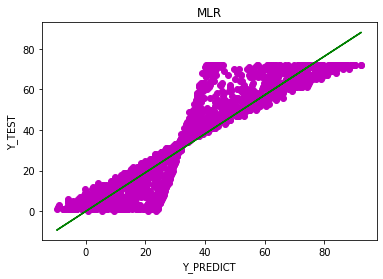

In [81]:
plot_RegressionLine(x_axis,y_axis, get_Coefficients(x_axis,y_axis))

In [82]:
np.array(y_test)

array([71,  5, 49, ..., 10, 22, 59])

In [83]:
# Linear Equation:

# tenure = 32.34442190669371 -12.26350411 * (MonthlyCharges) + 28.36624606 * (TotalCharges)

In [84]:
print('MAE is: ', metrics.mean_absolute_error(y_test,y_predict)) 
print('MSE is: ', metrics.mean_squared_error(y_test,y_predict)) 
print('RMSE is: ', math.sqrt(metrics.mean_squared_error(y_test,y_predict))) 

r2 = metrics.r2_score(y_test,y_predict)
print("R Squared: ",r2) 
print("Adjusted R-Squared : ", 1-(1-r2)*(len(y_test)-1)/(len(y_test)-x.shape[1]-1) ) 

rVal = np.sqrt(metrics.r2_score(y_test,y_predict))
print("R: ",rVal) 



MAE is:  7.282637083040115
MSE is:  100.68486194036554
RMSE is:  10.034184667443865
R Squared:  0.8284919483815101
Adjusted R-Squared :  0.828329381507938
R:  0.9102153307770146


In [85]:
regFeatures.tenure.mean()*.1

# RMSE must be <10% of MEAN(tenure).

3.237114865824223


# Inference:

# 1. Model took care of ~82% of the variance (R Squared value)

# 2. RMSE (= 10) is >10% of MEAN of Tenure (= 3.23). So, we shall try running Random Forest model to any better results of RMSE.

# 3. From the Beta coefficients, TotalCharges is influences the tenure of the customer more than the MonthlyCharges.

# 4. Holding all other features fixed,
# a. If you increase TotalCharges by 1 unit, the tenure will increase by 28.36624606 units
# b. If you increase MonthlyCharges by 1 unit, the tenure will decrease by 12.26350411 units

# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------

# Random Forest Regression

In [86]:
y = regFeatures.iloc[:,0]
x = regFeatures.iloc[:,1:]

In [87]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.3, random_state=15)

In [88]:
# Feature Scaling
# As MonthlyCharges and TotalCharges are in a different range, better to scale them for uniformity. 
# We don't need to scale Dependent variable

# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [89]:
rftree = RandomForestRegressor(n_estimators=300, random_state = 40)
rftree.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [90]:
y_predict = rftree.predict(x_test)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted tenure'])

In [91]:
rftree.feature_importances_

array([0.17243752, 0.82756248])

In [92]:
print('MAE is: ', metrics.mean_absolute_error(y_test,y_predict))
print('MSE is: ', metrics.mean_squared_error(y_test,y_predict))
print('RMSE is: ', math.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE is:  1.363125098595993
MSE is:  3.3719770573697216
RMSE is:  1.8362943820013504


# Inference:

# 1. RMSE (= 1.84) is <10% of MEAN of Tenure (= 3.23). So, this is definitely a better model that Linear Regression.

# 2. Looking at the Feature Importances, TotalCharges is influences the tenure of the customer more than the MonthlyCharges.

# ------------------------------------------------------------------------
# ------------------------------------------------------------------------
# Answer 2. Classification

In [93]:
classFeatures = customer_churn[['PaymentMethod','Contract','MonthlyCharges','Churn']]

In [94]:
classFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PaymentMethod   7043 non-null   object 
 1   Contract        7043 non-null   object 
 2   MonthlyCharges  7043 non-null   float64
 3   Churn           7043 non-null   object 
dtypes: float64(1), object(3)
memory usage: 220.2+ KB


In [95]:
classFeatures.head(30)

,PaymentMethod,Contract,MonthlyCharges,Churn
0,Electronic check,Month-to-month,29.85,No
1,Mailed check,One year,56.95,No
2,Mailed check,Month-to-month,53.85,Yes
3,Bank transfer (automatic),One year,42.30,No
4,Electronic check,Month-to-month,70.70,Yes
5,Electronic check,Month-to-month,99.65,Yes
6,Credit card (automatic),Month-to-month,89.10,No
7,Mailed check,Month-to-month,29.75,No
8,Electronic check,Month-to-month,104.80,Yes
9,Bank transfer (automatic),One year,56.15,No


In [96]:
classFeatures['Churn'] = classFeatures['Churn'].replace({'No': 0, 'Yes': 1})

/Users/vijaygomatam/Documents/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Random Forest Classifier - WITHOUT Using Dummy Variables

In [97]:
x = classFeatures.iloc[:,:3]
y = classFeatures.iloc[:,-1]

y


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [98]:
x.PaymentMethod,_ = pd.factorize(x.PaymentMethod)
x.Contract,_ = pd.factorize(x.Contract)

In [99]:
x.info

<bound method DataFrame.info of       PaymentMethod  Contract  MonthlyCharges
0                 0         0           29.85
1                 1         1           56.95
2                 1         0           53.85
3                 2         1           42.30
4                 0         0           70.70
...             ...       ...             ...
7038              1         1           84.80
7039              3         1          103.20
7040              0         0           29.60
7041              1         0           74.40
7042              2         2          105.65

[7043 rows x 3 columns]>

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = 18)

rftree = RandomForestClassifier(n_estimators=1000, random_state = 18)
rftree.fit(x_train, y_train)
y_predict = rftree.predict(x_test)

print("Accuracy: ",metrics.accuracy_score(y_test,y_predict))

y_predict = pd.DataFrame(y_predict, columns = ['Predicted Churn'])

Accuracy:  0.7030096536059057


Confusion Matrix:
 [[1037  284]
 [ 239  201]]
Accuracy Score:  0.7030096536059057
Error Score:  0.2969903463940943


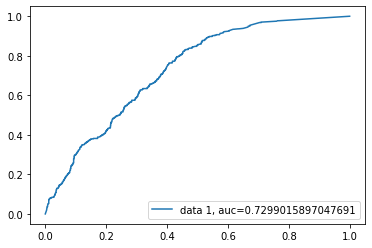

In [101]:
# 6 - ORIGINAL BEFORE APPLYING CUTOFF
cm = confusion_matrix(y_test, np.array(y_predict).reshape(-1,1))

aScore = accuracy_score(y_test, np.array(y_predict).reshape(-1,1))

print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", aScore)
print("Error Score: ", 1-aScore)

# ROC Curve to calculate Probability Value

y_pred_proba = rftree.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [102]:
print(rftree.predict([[1,1,295]]))

[0]


In [103]:
print(rftree.predict([[1,0,113]]))

[1]


In [104]:
y_predict

,Predicted Churn
0,1
1,1
2,0
3,0
4,0
...,...
1756,1
1757,0
1758,0
1759,0


In [105]:
rftree.feature_importances_

array([0.07395643, 0.15886739, 0.76717617])

Area under the ROC curve : 0.620915
###################################################
#
# Thresholds Cut-Off Value:  1
# FPR Value:  0.2149886449659349
# TPR Value:  0.45681818181818185
#
###################################################
Confusion Matrix:
 [[1315    6]
 [ 431    9]]
Accuracy Score:  0.7518455423055083
Error Score:  0.24815445769449174
Precision Score:  0.6
Recall Score:  0.020454545454545454


Text(0.5, 1.0, 'Receiver operating characteristic')

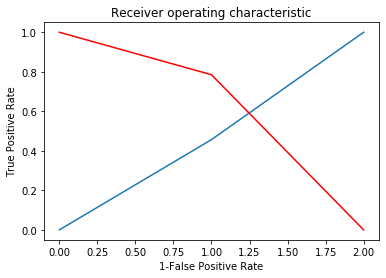

In [106]:

y_pred_proba = rftree.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test.iloc[:]).reshape(-1,1), np.array(y_predict['Predicted Churn'].iloc[:]).reshape(-1,1))
auc = metrics.roc_auc_score(np.array(y_test.iloc[:]).reshape(-1,1), np.array(y_predict['Predicted Churn'].iloc[:]).reshape(-1,1))
roc_auc = metrics.auc(fpr,tpr)
print("Area under the ROC curve : %f" % roc_auc)

#####################################################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
#####################################################################
i = np.arange(len(tpr)) # index for dataframe
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

fprValue = roc_t['fpr'].iloc[0]
tprValue = roc_t['tpr'].iloc[0]
thresholdsValue = roc_t['thresholds'].iloc[0]


print("###################################################")
print("#")
print("# Thresholds Cut-Off Value: ", thresholdsValue)
print("# FPR Value: ", fprValue)
print("# TPR Value: ", tprValue)
print("#")
print("###################################################")


thresholdsValue = roc_t['thresholds'].iloc[0]

y_pred_proba = pd.DataFrame(y_pred_proba.reshape(-1,1))
y_pred_proba.columns = ['thresholds']

y_pred_proba.reset_index(drop=True)
roc_t.reset_index(drop=True)
y_test.reset_index(drop=True)

y_predict_threshold_final = pd.DataFrame()
y_predict_threshold_final['Admission'] = np.where(y_pred_proba['thresholds'].iloc[:]>=thresholdsValue, 1, 0)

# from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_threshold_final)
aScore = accuracy_score(y_test, y_predict_threshold_final)

precisionScore = metrics.precision_score(y_test, y_predict_threshold_final) # It will tell True Positive
recallScore =  metrics.recall_score(y_test, y_predict_threshold_final) # For the True Positive

print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", aScore)
print("Error Score: ", 1-aScore)
print("Precision Score: ",precisionScore)
print("Recall Score: ", recallScore)


# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')

# Random Forest Classifier - WITH Using Dummy Variables

In [107]:
x = classFeatures.iloc[:,:3]
y = classFeatures.iloc[:,-1]

y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [108]:
# Created Dummy Variables for categorical variables

x = pd.get_dummies(x, columns=['PaymentMethod'],drop_first=True)
x = pd.get_dummies(x, columns=['Contract'],drop_first=True)

In [109]:
x.info

<bound method DataFrame.info of       MonthlyCharges  PaymentMethod_Credit card (automatic)  \
0              29.85                                      0   
1              56.95                                      0   
2              53.85                                      0   
3              42.30                                      0   
4              70.70                                      0   
...              ...                                    ...   
7038           84.80                                      0   
7039          103.20                                      1   
7040           29.60                                      0   
7041           74.40                                      0   
7042          105.65                                      0   

      PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                                  1                           0   
1                                  0                           1   
2      

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = 45)

rftree = RandomForestClassifier(n_estimators=1000, random_state = 45)
rftree.fit(x_train, y_train)
y_predict = rftree.predict(x_test)

print("Accuracy: ",metrics.accuracy_score(y_test,y_predict))

y_predict = pd.DataFrame(y_predict, columns = ['Predicted Churn'])

Accuracy:  0.7217490062464509


Confusion Matrix:
 [[1038  269]
 [ 221  233]]
Accuracy Score:  0.7217490062464509
Error Score:  0.2782509937535491


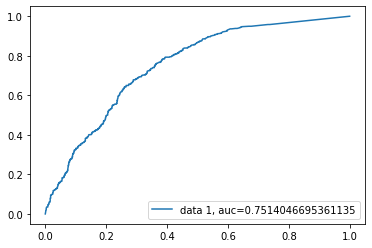

In [111]:
# ORIGINAL BEFORE APPLYING CUTOFF
cm = confusion_matrix(y_test, np.array(y_predict).reshape(-1,1))

aScore = accuracy_score(y_test, np.array(y_predict).reshape(-1,1))

print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", aScore)
print("Error Score: ", 1-aScore)

# ROC Curve to calculate Probability Value

y_pred_proba = rftree.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [112]:
print(rftree.predict([[84.80,0,0,1,1,0]]))

[0]


In [113]:
classFeatures[(classFeatures.MonthlyCharges==84.80) & (classFeatures.PaymentMethod=='Mailed check') & (classFeatures.Contract=='One year')]

,PaymentMethod,Contract,MonthlyCharges,Churn
7038,Mailed check,One year,84.8,0


In [114]:
rftree.feature_importances_

array([0.77222923, 0.00669187, 0.05397023, 0.00500984, 0.05750304,
       0.10459579])

In [115]:
y_test

5851    0
843     0
5442    0
4792    1
2303    1
       ..
4995    1
6369    0
6779    0
1430    0
1829    0
Name: Churn, Length: 1761, dtype: int64

Area under the ROC curve : 0.653701
###################################################
#
# Thresholds Cut-Off Value:  1
# FPR Value:  0.20581484315225707
# TPR Value:  0.513215859030837
#
###################################################
Confusion Matrix:
 [[1305    2]
 [ 448    6]]
Accuracy Score:  0.7444633730834753
Error Score:  0.2555366269165247
Precision Score:  0.75
Recall Score:  0.013215859030837005


Text(0.5, 1.0, 'Receiver operating characteristic')

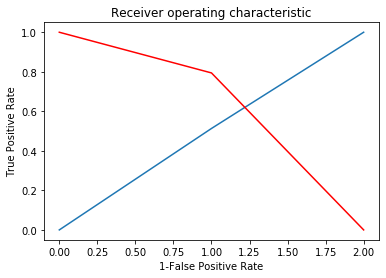

In [116]:

y_pred_proba = rftree.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test.iloc[:]).reshape(-1,1), np.array(y_predict['Predicted Churn'].iloc[:]).reshape(-1,1))
auc = metrics.roc_auc_score(np.array(y_test.iloc[:]).reshape(-1,1), np.array(y_predict['Predicted Churn'].iloc[:]).reshape(-1,1))
roc_auc = metrics.auc(fpr,tpr)
print("Area under the ROC curve : %f" % roc_auc)

#####################################################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
#####################################################################
i = np.arange(len(tpr)) # index for dataframe
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

fprValue = roc_t['fpr'].iloc[0]
tprValue = roc_t['tpr'].iloc[0]
thresholdsValue = roc_t['thresholds'].iloc[0]


print("###################################################")
print("#")
print("# Thresholds Cut-Off Value: ", thresholdsValue)
print("# FPR Value: ", fprValue)
print("# TPR Value: ", tprValue)
print("#")
print("###################################################")


thresholdsValue = roc_t['thresholds'].iloc[0]

y_pred_proba = pd.DataFrame(y_pred_proba.reshape(-1,1))
y_pred_proba.columns = ['thresholds']

y_pred_proba.reset_index(drop=True)
roc_t.reset_index(drop=True)
y_test.reset_index(drop=True)

y_predict_threshold_final = pd.DataFrame()
y_predict_threshold_final['Admission'] = np.where(y_pred_proba['thresholds'].iloc[:]>=thresholdsValue, 1, 0)

# from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_threshold_final)
aScore = accuracy_score(y_test, y_predict_threshold_final)

precisionScore = metrics.precision_score(y_test, y_predict_threshold_final) # It will tell True Positive
recallScore =  metrics.recall_score(y_test, y_predict_threshold_final) # For the True Positive

print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", aScore)
print("Error Score: ", 1-aScore)
print("Precision Score: ",precisionScore)
print("Recall Score: ", recallScore)


# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')

Area under the ROC curve : 0.653701


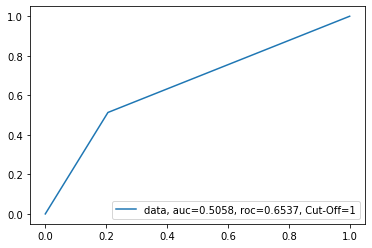

In [117]:

# ROC Curve to calculate Probability Value

auc = metrics.roc_auc_score(y_test, y_predict_threshold_final)
# auc = metrics.roc_auc_score(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the ROC curve : %f" % roc_auc)

plt.plot(fpr,tpr,label="data, auc="+str(round(auc,4))+", roc="+str(round(roc_auc,4))+", Cut-Off="+str(round(thresholdsValue,4)))
plt.legend(loc=4)
plt.show()

# auc (Area Under the Curve) means the data that is covered by the model to predict. Higher the auc, better is the prediction of the model.






# Inferring from the 2 Random Forest Classifier models with 2 scenarios in each: WITHOUT AND WITH Dummy Variables, the former 
#   performed a little better, 72% and 70% respectively.
# On the other hand, I have computed the Cut-Off too, but I have noticed that there is no significant improvement 
#   with the Cut-Off approach.

# With respect to the Feature Importances, MonthlyCharges influences the Churn to the best with 76% 
#   and little lower is the Contract with 15% and very significantly lower is the PaymentMethod with <1%


# We shall run this with the Logistic Regression too in both the scenario - with and without Dummy Variables.

# ------------------------------------------------------------------------
# ------------------------------------------------------------------------

# Logistic Regression

# WITHOUT DUMMY

In [118]:
x = classFeatures.iloc[:,:3]
y = classFeatures.iloc[:,-1]

y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [119]:
x

,PaymentMethod,Contract,MonthlyCharges
0,Electronic check,Month-to-month,29.85
1,Mailed check,One year,56.95
2,Mailed check,Month-to-month,53.85
3,Bank transfer (automatic),One year,42.30
4,Electronic check,Month-to-month,70.70
...,...,...,...
7038,Mailed check,One year,84.80
7039,Credit card (automatic),One year,103.20
7040,Electronic check,Month-to-month,29.60
7041,Mailed check,Month-to-month,74.40


In [120]:
x.PaymentMethod,_ = pd.factorize(x.PaymentMethod)
x.Contract,_ = pd.factorize(x.Contract)

In [121]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.25, random_state=60)

In [122]:
M1 = LogisticRegression() # also adding "seed"
M1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
y_predict = M1.predict(x_test)

Confusion Matrix:
 [[1141  132]
 [ 287  201]]
Accuracy Score:  0.7620670073821693
Error Score:  0.23793299261783074
Precision Score:  0.6036036036036037
Recall Score:  0.41188524590163933


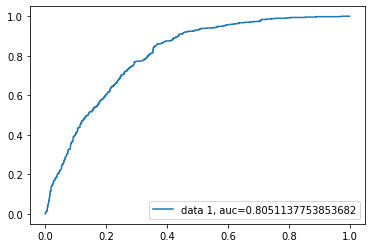

In [124]:
# 6 - ORIGINAL BEFORE APPLYING CUTOFF
cm = confusion_matrix(y_test, y_predict)

aScore = accuracy_score(y_test, y_predict)

precisionScore = metrics.precision_score(y_test, y_predict) # It will tell True Positive
recallScore =  metrics.recall_score(y_test, y_predict) # For the True Positive

print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", aScore)
print("Error Score: ", 1-aScore)
print("Precision Score: ",precisionScore)
print("Recall Score: ", recallScore)


# ROC Curve to calculate Probability Value

y_pred_proba = M1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# auc (Area Under the Curve) means the data that is covered by the model to predict. Higher the auc, better is the prediction of the model.

Area under the ROC curve : 0.805114
###################################################
#
# Thresholds Cut-Off Value:  0.329798626788102
# FPR Value:  0.2694422623723488
# TPR Value:  0.7315573770491803
#
###################################################
Confusion Matrix:
 [[930 343]
 [131 357]]
Accuracy Score:  0.7308347529812607
Error Score:  0.26916524701873934
Precision Score:  0.51
Recall Score:  0.7315573770491803


Text(0.5, 1.0, 'Receiver operating characteristic')

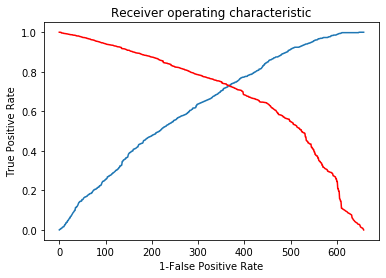

In [125]:
# 7 - AFTER APPLYING CUTOFF

# When x_test values are given to be predicted, y_predict_thresholds_final will have the final value for x_test

y_pred_proba = M1.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the ROC curve : %f" % roc_auc)

#####################################################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
#####################################################################
i = np.arange(len(tpr)) # index for dataframe
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

fprValue = roc_t['fpr'].iloc[0]
tprValue = roc_t['tpr'].iloc[0]
thresholdsValue = roc_t['thresholds'].iloc[0]


print("###################################################")
print("#")
print("# Thresholds Cut-Off Value: ", thresholdsValue)
print("# FPR Value: ", fprValue)
print("# TPR Value: ", tprValue)
print("#")
print("###################################################")


thresholdsValue = roc_t['thresholds'].iloc[0]

y_pred_proba = pd.DataFrame(y_pred_proba.reshape(-1,1))
y_pred_proba.columns = ['thresholds']

y_pred_proba.reset_index(drop=True)
roc_t.reset_index(drop=True)
y_test.reset_index(drop=True)

y_predict_threshold_final = pd.DataFrame()
y_predict_threshold_final['Admission'] = np.where(y_pred_proba['thresholds'].iloc[:]>=thresholdsValue, 1, 0)

# from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_threshold_final)
aScore = accuracy_score(y_test, y_predict_threshold_final)

precisionScore = metrics.precision_score(y_test, y_predict_threshold_final) # It will tell True Positive
recallScore =  metrics.recall_score(y_test, y_predict_threshold_final) # For the True Positive

print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", aScore)
print("Error Score: ", 1-aScore)
print("Precision Score: ",precisionScore)
print("Recall Score: ", recallScore)


# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')

Area under the ROC curve : 0.805114


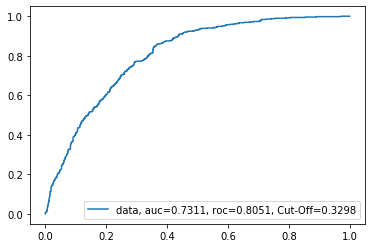

In [126]:

# ROC Curve to calculate Probability Value

auc = metrics.roc_auc_score(y_test, y_predict_threshold_final)
# auc = metrics.roc_auc_score(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the ROC curve : %f" % roc_auc)

plt.plot(fpr,tpr,label="data, auc="+str(round(auc,4))+", roc="+str(round(roc_auc,4))+", Cut-Off="+str(round(thresholdsValue,4)))
plt.legend(loc=4)
plt.show()

# auc (Area Under the Curve) means the data that is covered by the model to predict. Higher the auc, better is the prediction of the model.

In [127]:
M1.intercept_

array([-1.22067816])

In [128]:
M1.coef_

array([[-0.26675989, -1.62720832,  0.01703156]])

# Logistic Equation - Without Dummy Variables

# Churn = - 1.22067816 - 0.26675989 x (PaymentMethod) 
#                - 1.62720832 x (Contract) + 0.01703156 x (MonthlyCharges)

In [129]:
# Churn = -1.22067816 - 0.26675989*(PaymentMethod) - 1.62720832*(Contract) + 0.01703156(MonthlyCharges)

# WITH DUMMY

In [130]:
x = classFeatures.iloc[:,:3]
y = classFeatures.iloc[:,-1]

y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [131]:
x

,PaymentMethod,Contract,MonthlyCharges
0,Electronic check,Month-to-month,29.85
1,Mailed check,One year,56.95
2,Mailed check,Month-to-month,53.85
3,Bank transfer (automatic),One year,42.30
4,Electronic check,Month-to-month,70.70
...,...,...,...
7038,Mailed check,One year,84.80
7039,Credit card (automatic),One year,103.20
7040,Electronic check,Month-to-month,29.60
7041,Mailed check,Month-to-month,74.40


In [132]:
# Created Dummy Variables for categorical variables

x = pd.get_dummies(x, columns=['PaymentMethod'],drop_first=True)
x = pd.get_dummies(x, columns=['Contract'],drop_first=True)

In [133]:
x

,MonthlyCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,29.85,0,1,0,0,0
1,56.95,0,0,1,1,0
2,53.85,0,0,1,0,0
3,42.30,0,0,0,1,0
4,70.70,0,1,0,0,0
...,...,...,...,...,...,...
7038,84.80,0,0,1,1,0
7039,103.20,1,0,0,1,0
7040,29.60,0,1,0,0,0
7041,74.40,0,0,1,0,0


In [134]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.25, random_state=60)

In [135]:
M1 = LogisticRegression() # also adding "seed"
M1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
y_predict = M1.predict(x_test)

Confusion Matrix:
 [[1140  133]
 [ 277  211]]
Accuracy Score:  0.7671777399204998
Error Score:  0.23282226007950024
Precision Score:  0.6133720930232558
Recall Score:  0.4323770491803279


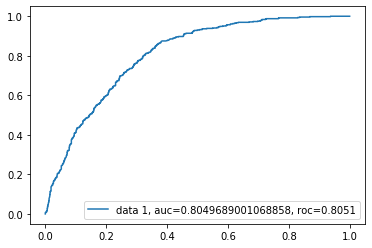

In [137]:
# 6 - ORIGINAL BEFORE APPLYING CUTOFF
cm = confusion_matrix(y_test, y_predict)

aScore = accuracy_score(y_test, y_predict)

precisionScore = metrics.precision_score(y_test, y_predict) # It will tell True Positive
recallScore =  metrics.recall_score(y_test, y_predict) # For the True Positive

print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", aScore)
print("Error Score: ", 1-aScore)
print("Precision Score: ",precisionScore)
print("Recall Score: ", recallScore)


# ROC Curve to calculate Probability Value

y_pred_proba = M1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)+", roc="+str(round(roc_auc,4)))
plt.legend(loc=4)
plt.show()

# auc (Area Under the Curve) means the data that is covered by the model to predict. Higher the auc, better is the prediction of the model.

Area under the ROC curve : 0.804969
###################################################
#
# Thresholds Cut-Off Value:  0.3309867716993546
# FPR Value:  0.27101335428122547
# TPR Value:  0.7295081967213115
#
###################################################
Confusion Matrix:
 [[928 345]
 [132 356]]
Accuracy Score:  0.7291311754684838
Error Score:  0.2708688245315162
Precision Score:  0.5078459343794579
Recall Score:  0.7295081967213115


Text(0.5, 1.0, 'Receiver operating characteristic')

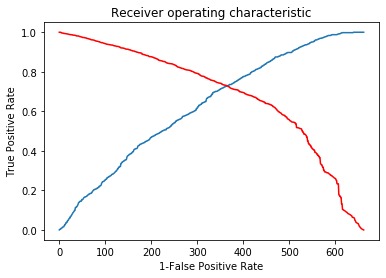

In [138]:
# 7 - AFTER APPLYING CUTOFF

# When x_test values are given to be predicted, y_predict_thresholds_final will have the final value for x_test

y_pred_proba = M1.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the ROC curve : %f" % roc_auc)

#####################################################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
#####################################################################
i = np.arange(len(tpr)) # index for dataframe
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

fprValue = roc_t['fpr'].iloc[0]
tprValue = roc_t['tpr'].iloc[0]
thresholdsValue = roc_t['thresholds'].iloc[0]


print("###################################################")
print("#")
print("# Thresholds Cut-Off Value: ", thresholdsValue)
print("# FPR Value: ", fprValue)
print("# TPR Value: ", tprValue)
print("#")
print("###################################################")


thresholdsValue = roc_t['thresholds'].iloc[0]

y_pred_proba = pd.DataFrame(y_pred_proba.reshape(-1,1))
y_pred_proba.columns = ['thresholds']

y_pred_proba.reset_index(drop=True)
roc_t.reset_index(drop=True)
y_test.reset_index(drop=True)

y_predict_threshold_final = pd.DataFrame()
y_predict_threshold_final['Admission'] = np.where(y_pred_proba['thresholds'].iloc[:]>=thresholdsValue, 1, 0)

# from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_threshold_final)
aScore = accuracy_score(y_test, y_predict_threshold_final)

precisionScore = metrics.precision_score(y_test, y_predict_threshold_final) # It will tell True Positive
recallScore =  metrics.recall_score(y_test, y_predict_threshold_final) # For the True Positive

print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", aScore)
print("Error Score: ", 1-aScore)
print("Precision Score: ",precisionScore)
print("Recall Score: ", recallScore)


# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')

Area under the ROC curve : 0.804969


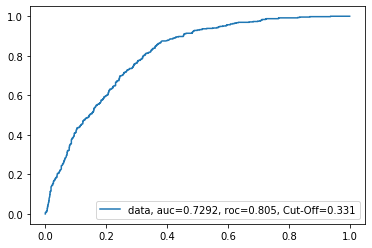

In [139]:

# ROC Curve to calculate Probability Value

auc = metrics.roc_auc_score(y_test, y_predict_threshold_final)
# auc = metrics.roc_auc_score(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the ROC curve : %f" % roc_auc)

plt.plot(fpr,tpr,label="data, auc="+str(round(auc,4))+", roc="+str(round(roc_auc,4))+", Cut-Off="+str(round(thresholdsValue,4)))
plt.legend(loc=4)
plt.show()

# auc (Area Under the Curve) means the data that is covered by the model to predict. Higher the auc, better is the prediction of the model.

In [140]:
M1.intercept_

array([-1.79281697])

In [141]:
M1.coef_

array([[ 0.01570448,  0.03560658,  0.7299348 ,  0.23476788, -1.67805577,
        -3.03791024]])

# Logistic Regression Equation (with Dummy Variables) -- 

# Churn = - 1.79281697
#        + 0.01570448 x (MonthlyCharges) 
#        + 0.03560658 x (PaymentMethod_Credit card (automatic))
#        + 0.7299348 x (PaymentMethod_Electronic check) 
#       + 0.23476788 x (PaymentMethod_Mailed check)
#        - 1.67805577 x (Contract_One year) - 3.03791024 x (Contract_Two year)

# ----------------------------------------

# Logistic Regression Equation (without Dummy Variables) -- 

# Churn = - 1.22067816 - 0.26675989 x (PaymentMethod)
#         - 1.62720832 x (Contract) + 0.01703156 x (MonthlyCharges)

# ---------------------------------------------

# Inferring from the 2 Logistic Regression Classifier models with 2 scenarios in each: WITHOUT and WITH Dummy Variables, the former, 
#   WITHOUT Dummy Variables performed a little better, 70% vs 72% respectively.
# On the other hand, I have computed the Cut-Off too, but I have noticed that there is no significant improvement 
#   with the Cut-Off approach. Without Cut-Off had better Accuracy and AUC values.

# ---------------------------------------------

# Considering the results from WITHOUT DUMMY VARIABLES:

# With respect to the Feature Importance, "Contract" influences the Churn to the most negatively 
#   (especially 2 year contract)
#   and very significantly lower influence is the MonthlyCharges with <2%

In [142]:
x

,MonthlyCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,29.85,0,1,0,0,0
1,56.95,0,0,1,1,0
2,53.85,0,0,1,0,0
3,42.30,0,0,0,1,0
4,70.70,0,1,0,0,0
...,...,...,...,...,...,...
7038,84.80,0,0,1,1,0
7039,103.20,1,0,0,1,0
7040,29.60,0,1,0,0,0
7041,74.40,0,0,1,0,0
